In [1]:
import os
import sys
#os.chdir('./ChexNet')
os.getcwd()

'/home/roberto/Documents/CheXNet'

In [2]:
runsdir = '/home/roberto/Dropbox/SSL_Chexnet_training_data/mestrado_backup/runs k=0.75 strong/'

In [3]:
import numpy as np
from torchvision.transforms import transforms
import tikzplotlib


In [4]:
total = 50_000

train5 = 5_000   # rotulado
train95 = 45_000 # nao rotulado

total_validacao = 7371
total_teste = 22_000

In [5]:
from packaging import version
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator

In [6]:
def tb_tags(path):
    ea = EventAccumulator(path)
    ea.Reload()
    return ea.Tags()['scalars']
    
def tb_values(path, tag):
    ea = EventAccumulator(path)
    ea.Reload()
    times, steps, vals = zip(*ea.Scalars(tag))
    return times, steps, vals

# Treinamento particao 20%

['loss/train', 'lr/train', 'auroc/validation', 'training_time']
['loss/train', 'lr/train', 'auroc/validation', 'training_time']
['loss/train', 'lr/train', 'auroc/validation', 'training_time']


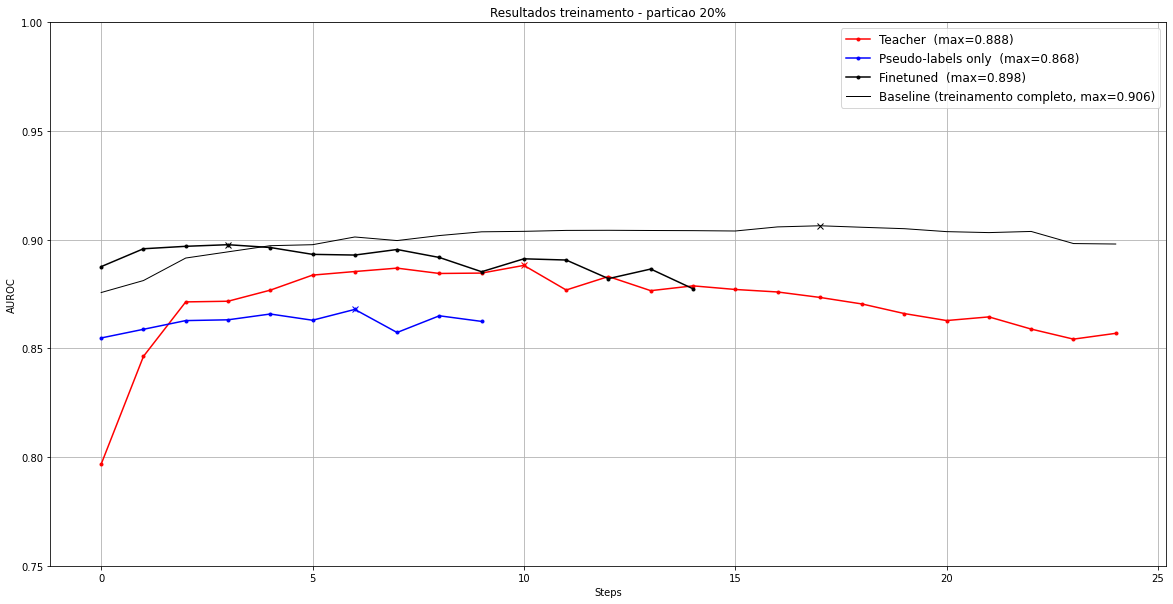

In [12]:
teacher  = runsdir+'effusion_train20%_teacher_00/'
pseudo   = runsdir+'effusion_train20%_pseudolabels_00/'
finetune = runsdir+'effusion_train20%_finetune_00/'
fullrun = runsdir+'effusion_train_full/'

for folder in [teacher, pseudo, finetune]:
    print(tb_tags(folder))

data_teacher = tb_values(teacher, 'auroc/validation')
data_pseudo = tb_values(pseudo, 'auroc/validation')
data_finetune = tb_values(finetune, 'auroc/validation')
data_full_train = tb_values(fullrun, 'auroc/validation')

plt.figure(figsize=(20,10)), plt.grid(which='major'), plt.ylim([0.75,1])

for data, c, l in zip([data_teacher, data_pseudo, data_finetune],
                      ['r', 'b', 'k'],
                      ['Teacher', 'Pseudo-labels only', 'Finetuned']):
    amax = np.argmax(data[2])
    plt.plot(data[2], '-'+c+'.', label=l + f'  (max={round(data[2][amax], 3)})')    
    plt.plot(amax, data[2][amax], c+'x')

amax = np.argmax(data_full_train[2])
plt.plot(data_full_train[2], '-k', linewidth=1.0, label=f"Baseline (treinamento completo, max={round(data_full_train[2][amax], 3)})")
plt.plot(amax, data_full_train[2][amax], c+'x')

plt.legend(fontsize='large')
plt.title('Resultados treinamento - particao 20%')
plt.xlabel('Steps')
plt.ylabel('AUROC')
plt.savefig(fname='./images_strongrun/auroc_20%_partition.png')
tikzplotlib.save("test.tex")


# Treinamento partição 10%

['loss/train', 'lr/train', 'auroc/validation', 'training_time']
['loss/train', 'lr/train', 'auroc/validation', 'training_time']
['loss/train', 'lr/train', 'auroc/validation', 'training_time']


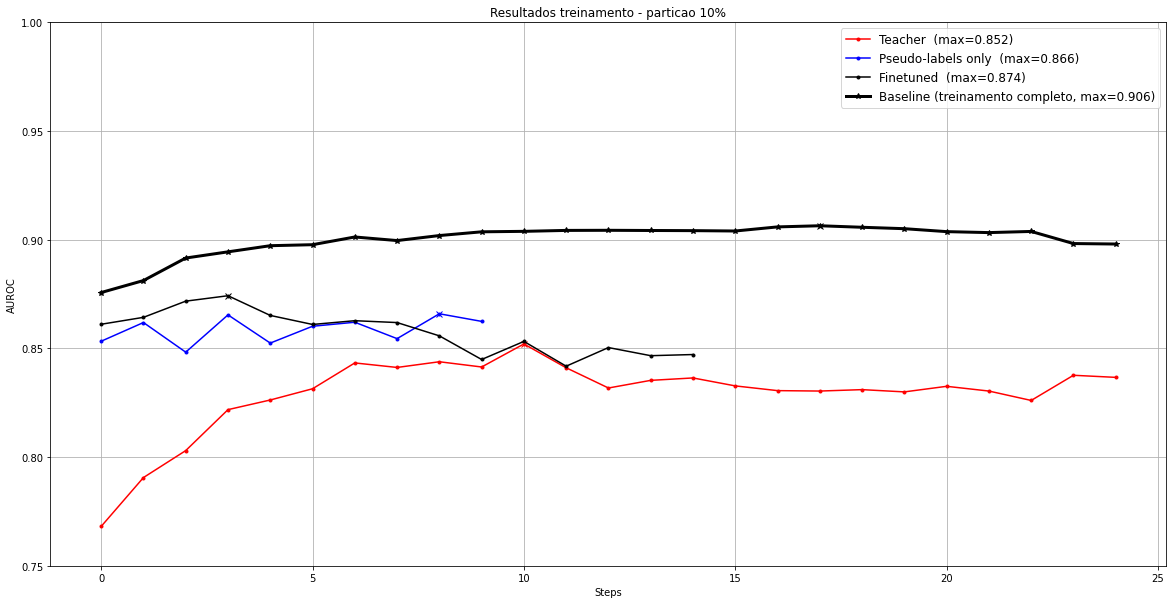

In [11]:
teacher  = runsdir+'effusion_train10%_teacher_00/'
pseudo   = runsdir+'effusion_train10%_pseudolabels_00/'
finetune = runsdir+'effusion_train10%_finetune_00/'
fullrun = runsdir+'effusion_train_full/'

for folder in [teacher, pseudo, finetune]:
    print(tb_tags(folder))

data_teacher = tb_values(teacher, 'auroc/validation')
data_pseudo = tb_values(pseudo, 'auroc/validation')
data_finetune = tb_values(finetune, 'auroc/validation')
data_full_train = tb_values(fullrun, 'auroc/validation')

plt.figure(figsize=(20,10)), plt.grid(which='major'), plt.ylim([0.75,1])

for data, c, l in zip([data_teacher, data_pseudo, data_finetune],
                      ['r', 'b', 'k'],
                      ['Teacher', 'Pseudo-labels only', 'Finetuned']):
    amax = np.argmax(data[2])
    plt.plot(data[2], '-'+c+'.', label=l + f'  (max={round(data[2][amax], 3)})')    
    plt.plot(amax, data[2][amax], c+'x')

amax = np.argmax(data_full_train[2])
plt.plot(data_full_train[2], '-k*', linewidth=3.0, label=f"Baseline (treinamento completo, max={round(data_full_train[2][amax], 3)})")
plt.plot(amax, data_full_train[2][amax], c+'x')

plt.legend(fontsize='large')
plt.title('Resultados treinamento - particao 10%')
plt.xlabel('Steps')
plt.ylabel('AUROC')
plt.savefig(fname='./images_strongrun/auroc_10%_partition.png')

# Treinamento partição 5%

['loss/train', 'lr/train', 'auroc/validation', 'training_time']
['loss/train', 'lr/train', 'auroc/validation', 'training_time']
['loss/train', 'lr/train', 'auroc/validation', 'training_time']


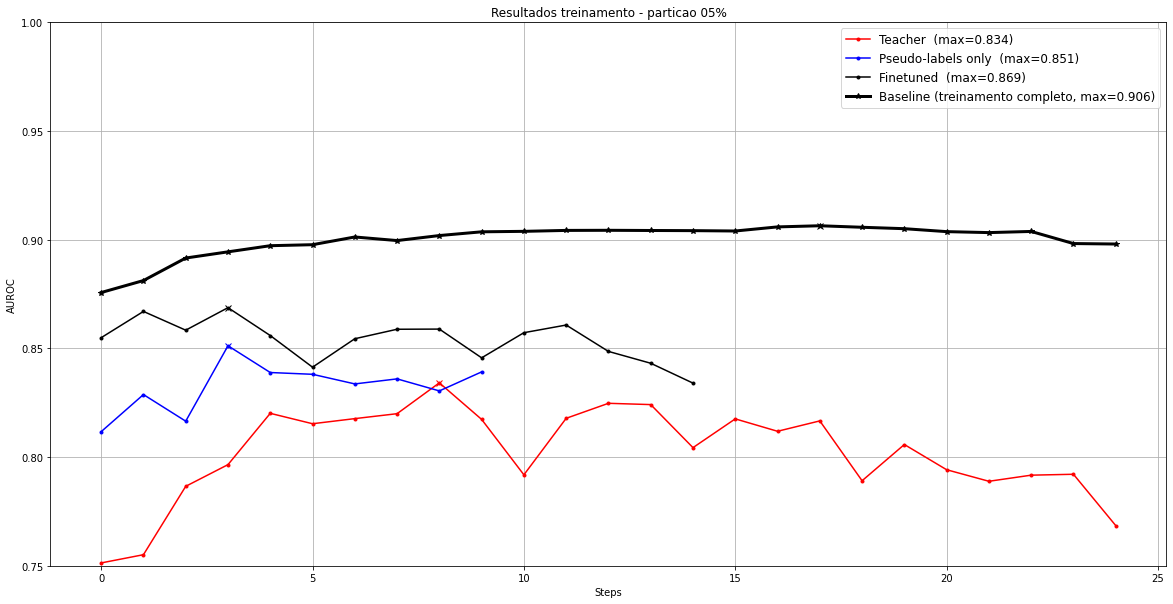

In [12]:
teacher  = runsdir+'effusion_train05%_teacher_00/'
pseudo   = runsdir+'effusion_train05%_pseudolabels_00/'
finetune = runsdir+'effusion_train05%_finetune_00/'
fullrun = runsdir+'effusion_train_full/'

for folder in [teacher, pseudo, finetune]:
    print(tb_tags(folder))

data_teacher = tb_values(teacher, 'auroc/validation')
data_pseudo = tb_values(pseudo, 'auroc/validation')
data_finetune = tb_values(finetune, 'auroc/validation')
data_full_train = tb_values(fullrun, 'auroc/validation')

plt.figure(figsize=(20,10)), plt.grid(which='major'), plt.ylim([0.75,1])

for data, c, l in zip([data_teacher, data_pseudo, data_finetune],
                      ['r', 'b', 'k'],
                      ['Teacher', 'Pseudo-labels only', 'Finetuned']):
    amax = np.argmax(data[2])
    plt.plot(data[2], '-'+c+'.', label=l + f'  (max={round(data[2][amax], 3)})')    
    plt.plot(amax, data[2][amax], c+'x')

amax = np.argmax(data_full_train[2])
plt.plot(data_full_train[2], '-k*', linewidth=3.0, label=f"Baseline (treinamento completo, max={round(data_full_train[2][amax], 3)})")
plt.plot(amax, data_full_train[2][amax], c+'x')

plt.legend(fontsize='large')
plt.title('Resultados treinamento - particao 05%')
plt.xlabel('Steps')
plt.ylabel('AUROC')
plt.savefig(fname='./images_strongrun/auroc_05%_partition.png')

# Treinamento particao 2%

['lr/train', 'auroc/validation', 'training_time']
['loss/train', 'lr/train', 'auroc/validation', 'training_time']
['lr/train', 'auroc/validation', 'training_time']


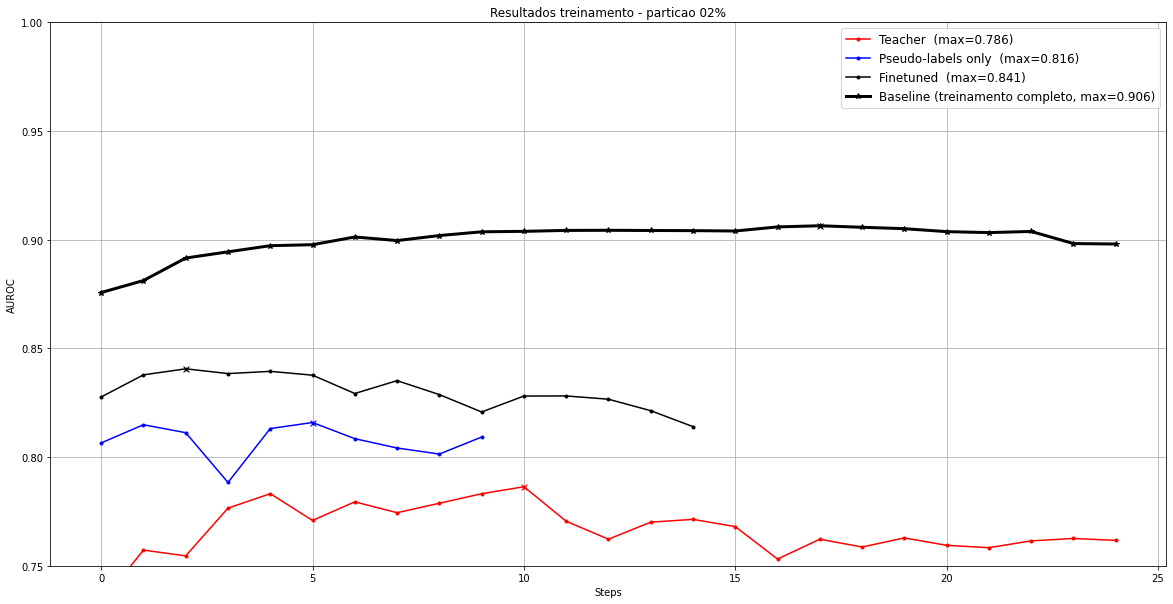

In [13]:
teacher  = runsdir+'effusion_train02%_teacher_00/'
pseudo   = runsdir+'effusion_train02%_pseudolabels_00/'
finetune = runsdir+'effusion_train02%_finetune_00/'
fullrun = runsdir+'effusion_train_full/'

for folder in [teacher, pseudo, finetune]:
    print(tb_tags(folder))

data_teacher = tb_values(teacher, 'auroc/validation')
data_pseudo = tb_values(pseudo, 'auroc/validation')
data_finetune = tb_values(finetune, 'auroc/validation')
data_full_train = tb_values(fullrun, 'auroc/validation')

plt.figure(figsize=(20,10)), plt.grid(which='major'), plt.ylim([0.75,1])

for data, c, l in zip([data_teacher, data_pseudo, data_finetune],
                      ['r', 'b', 'k'],
                      ['Teacher', 'Pseudo-labels only', 'Finetuned']):
    amax = np.argmax(data[2])
    plt.plot(data[2], '-'+c+'.', label=l + f'  (max={round(data[2][amax], 3)})')    
    plt.plot(amax, data[2][amax], c+'x')

amax = np.argmax(data_full_train[2])
plt.plot(data_full_train[2], '-k*', linewidth=3.0, label=f"Baseline (treinamento completo, max={round(data_full_train[2][amax], 3)})")
plt.plot(amax, data_full_train[2][amax], c+'x')

plt.legend(fontsize='large')
plt.title('Resultados treinamento - particao 02%')
plt.xlabel('Steps')
plt.ylabel('AUROC')
plt.savefig(fname='./images_strongrun/auroc_02%_partition.png')

# Comparação Teachers (20% vs 10% vs 5% vs 2%)

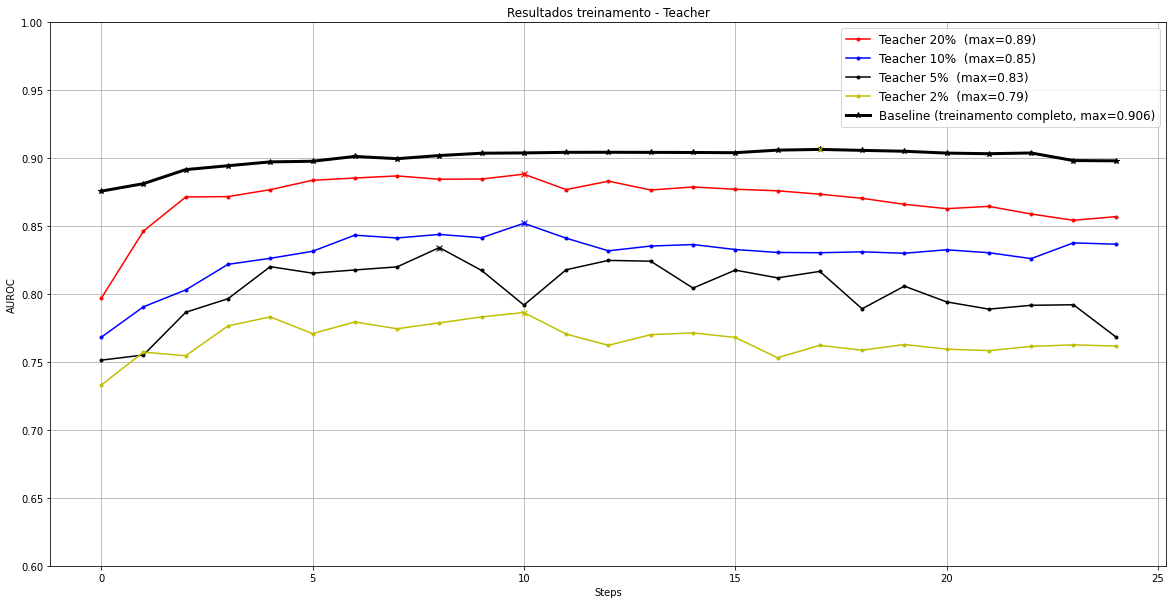

In [21]:
# comparacao teachers
training_data = []
for p in ['20', '10', '05', '02']:
    training_data.append(tb_values(runsdir+f'effusion_train{p}%_teacher_00/', 'auroc/validation'))

plt.figure(figsize=(20,10)), plt.grid(which='major'), plt.ylim([0.6,1])

runtype = 'Teacher'
for data, c, l in zip(training_data,
                      ['r', 'b', 'k', 'y'],
                      [f'{runtype} 20%',f'{runtype} 10%', f'{runtype} 5%', f'{runtype} 2%']):
    amax = np.argmax(data[2])
    plt.plot(data[2], '-'+c+'.', label=l + f'  (max={round(data[2][amax], 2)})')    
    plt.plot(amax, data[2][amax], c+'x')
    
    
fullrun = runsdir+'effusion_train_full/'
data_full_train = tb_values(fullrun, 'auroc/validation')
amax = np.argmax(data_full_train[2])
plt.plot(data_full_train[2], '-k*', linewidth=3.0, label=f"Baseline (treinamento completo, max={round(data_full_train[2][amax], 3)})")
plt.plot(amax, data_full_train[2][amax], c+'x')

plt.legend(fontsize='large')
plt.title(f'Resultados treinamento - {runtype}')
plt.xlabel('Steps')
plt.ylabel('AUROC')
plt.savefig(fname=f'./images_strongrun/comparison_teachers.png')
tikzplotlib.save('./paper_images/teacher_comparison.tex')

# Comparação pseudolabels

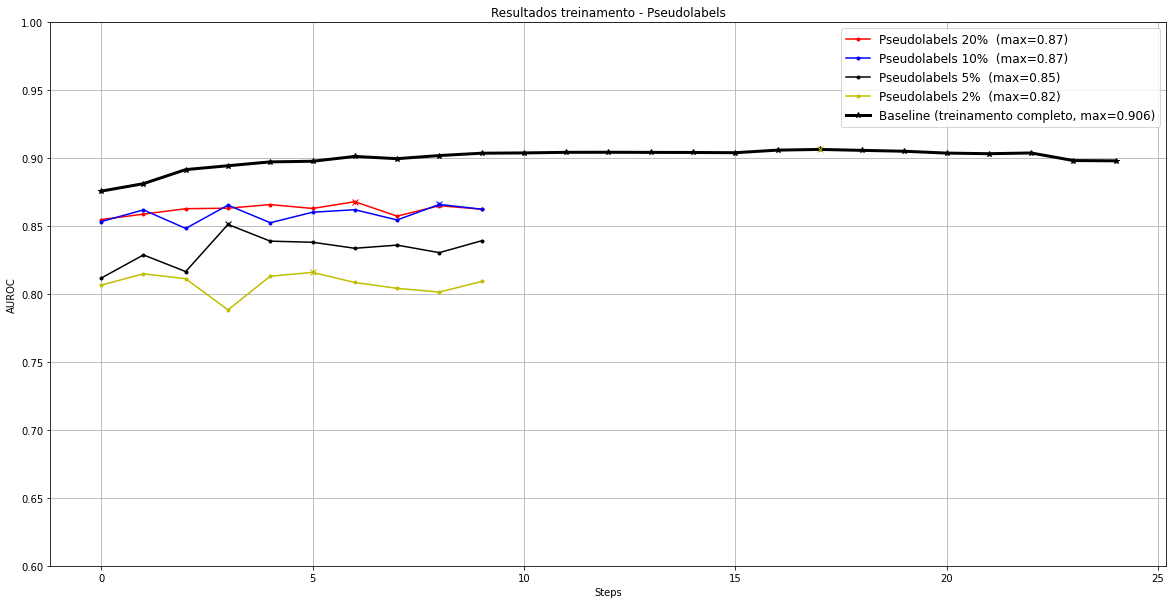

In [15]:
# comparacao teachers
training_data = []
for p in ['20', '10', '05', '02']:
    training_data.append(tb_values(runsdir+f'effusion_train{p}%_pseudolabels_00/', 'auroc/validation'))

plt.figure(figsize=(20,10)), plt.grid(which='major'), plt.ylim([0.6,1])

runtype = 'Pseudolabels'
for data, c, l in zip(training_data,
                      ['r', 'b', 'k', 'y'],
                      [f'{runtype} 20%',f'{runtype} 10%', f'{runtype} 5%', f'{runtype} 2%']):
    amax = np.argmax(data[2])
    plt.plot(data[2], '-'+c+'.', label=l + f'  (max={round(data[2][amax], 2)})')    
    plt.plot(amax, data[2][amax], c+'x')
    
    
fullrun = runsdir+'effusion_train_full/'
data_full_train = tb_values(fullrun, 'auroc/validation')
amax = np.argmax(data_full_train[2])
plt.plot(data_full_train[2], '-k*', linewidth=3.0, label=f"Baseline (treinamento completo, max={round(data_full_train[2][amax], 3)})")
plt.plot(amax, data_full_train[2][amax], c+'x')

plt.legend(fontsize='large')
plt.title(f'Resultados treinamento - {runtype}')
plt.xlabel('Steps')
plt.ylabel('AUROC')
plt.savefig(fname=f'./images_strongrun/comparison_pseudolabels.png')

# Comparação finetune students

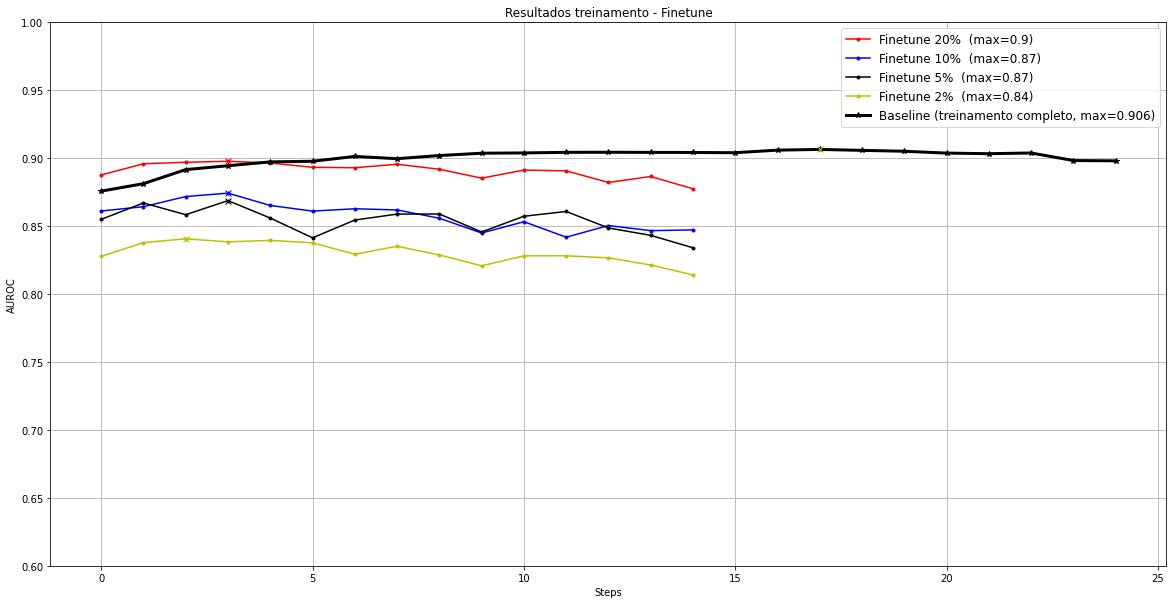

In [22]:
# comparacao teachers
training_data = []
for p in ['20', '10', '05', '02']:
    training_data.append(tb_values(runsdir+f'effusion_train{p}%_finetune_00/', 'auroc/validation'))

plt.figure(figsize=(20,10)), plt.grid(which='major'), plt.ylim([0.6,1])

runtype = 'Finetune'
for data, c, l in zip(training_data,
                      ['r', 'b', 'k', 'y'],
                      [f'{runtype} 20%',f'{runtype} 10%', f'{runtype} 5%', f'{runtype} 2%']):
    amax = np.argmax(data[2])
    plt.plot(data[2], '-'+c+'.', label=l + f'  (max={round(data[2][amax], 2)})')    
    plt.plot(amax, data[2][amax], c+'x')
    
    
fullrun = runsdir+'effusion_train_full/'
data_full_train = tb_values(fullrun, 'auroc/validation')
amax = np.argmax(data_full_train[2])
plt.plot(data_full_train[2], '-k*', linewidth=3.0, label=f"Baseline (treinamento completo, max={round(data_full_train[2][amax], 3)})")
plt.plot(amax, data_full_train[2][amax], c+'x')

plt.legend(fontsize='large')
plt.title(f'Resultados treinamento - {runtype}')
plt.xlabel('Steps')
plt.ylabel('AUROC')
plt.savefig(fname=f'./images_strongrun/comparison_finetune.png')
tikzplotlib.save('./paper_images/student_comparison.tex')

# Comparação finetune 2% e 5% vs teacher 10% e 20%

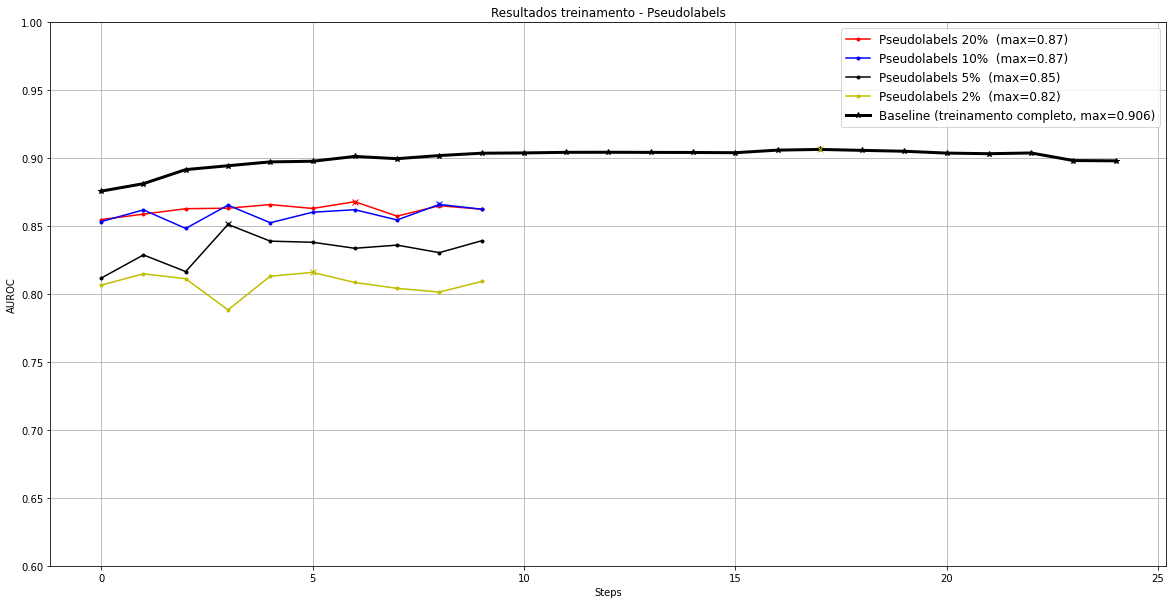

In [17]:
# comparacao teachers
training_data = []
for p in ['20', '10', '05', '02']:
    training_data.append(tb_values(runsdir+f'effusion_train{p}%_pseudolabels_00/', 'auroc/validation'))

plt.figure(figsize=(20,10)), plt.grid(which='major'), plt.ylim([0.6,1])

runtype = 'Pseudolabels'
for data, c, l in zip(training_data,
                      ['r', 'b', 'k', 'y'],
                      [f'{runtype} 20%',f'{runtype} 10%', f'{runtype} 5%', f'{runtype} 2%']):
    amax = np.argmax(data[2])
    plt.plot(data[2], '-'+c+'.', label=l + f'  (max={round(data[2][amax], 2)})')    
    plt.plot(amax, data[2][amax], c+'x')
    
    
fullrun = runsdir+'effusion_train_full/'
data_full_train = tb_values(fullrun, 'auroc/validation')
amax = np.argmax(data_full_train[2])
plt.plot(data_full_train[2], '-k*', linewidth=3.0, label=f"Baseline (treinamento completo, max={round(data_full_train[2][amax], 3)})")
plt.plot(amax, data_full_train[2][amax], c+'x')

plt.legend(fontsize='large')
plt.title(f'Resultados treinamento - {runtype}')
plt.xlabel('Steps')
plt.ylabel('AUROC')
plt.savefig(fname=f'./images_strongrun/comparison_pseudolabels.png')

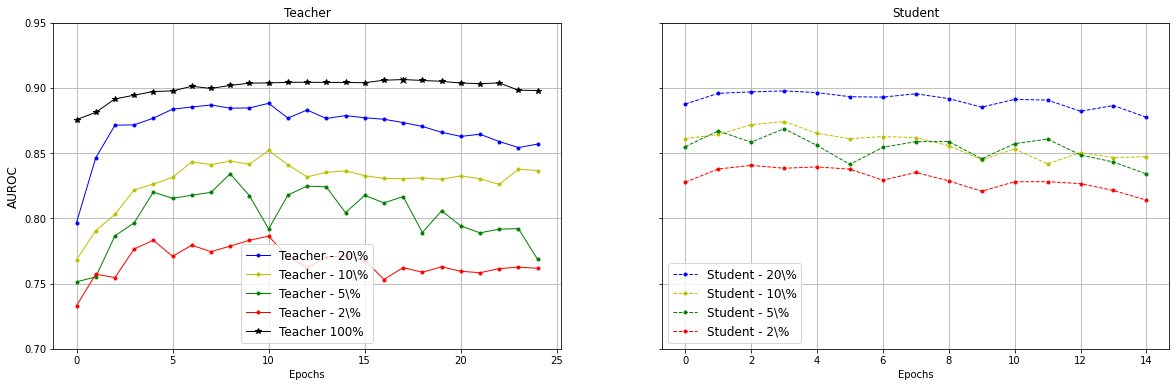

In [16]:
#plt.figure(figsize=(20,10)), plt.grid(which='major'), plt.ylim([0.65,0.95])

fig, (ax1, ax2) = plt.subplots(1,2, sharey=True, figsize=(20,6),)
labels_dict = {
    '20':"20\%",
    '10':"10\%",
    '05':"5\%",
    '02':"2\%"
    
}
# Data for teachers
colors = ['r','g','y','b']
legends = []
for p in ['20', '10','05','02']:
    data = tb_values(runsdir+f'effusion_train{p}%_teacher_00/', 'auroc/validation')
    c = colors.pop()
    l = f"Teacher - {labels_dict[p]}"
    amax = np.argmax(data[2])
    ax1.plot(data[2], '-'+c+'.', linewidth=1)    
    legends.append(l)
    #ax1.plot(amax, data[2][amax], c+'x')

ax1.grid()
ax1.set_ylim([0.7,0.95])

  
fullrun = runsdir+'effusion_train_full/'
data_full_train = tb_values(fullrun, 'auroc/validation')
amax = np.argmax(data_full_train[2])
ax1.plot(data_full_train[2], '-k*', linewidth=1.0)
ax1.plot(amax, data_full_train[2][amax], 'kx')
legends.append("Teacher 100%")
ax1.legend(legends, fontsize='large')


colors = ['r','g','y','b']
legends = []
for p in ['20', '10', '05','02']:
    data = tb_values(runsdir+f'effusion_train{p}%_finetune_00/', 'auroc/validation')
    c = colors.pop()
    l = f"Student - {labels_dict[p]}"
    amax = np.argmax(data[2])
    ax2.plot(data[2], '--'+c+'.', linewidth=1)
    #ax2.plot(amax, data[2][amax], c+'x')
    legends.append(l)
ax2.legend(legends, fontsize='large')
ax2.grid()

  

#plt.legend(fontsize='large')
ax1.set_title(f'Teacher')
ax2.set_title(f'Student')
ax1.set_xlabel('Epochs')
ax2.set_xlabel('Epochs')
ax1.set_ylabel('AUROC',  fontsize='large')
plt.savefig(fname=f'./images_strongrun/comparison_finetune_vs_teacher.png')
tikzplotlib.save('./paper_images/teacher_stdent_comparison.tex')

In [18]:
fullrun = runsdir+'effusion_train_full/'
data_full_train = tb_values(fullrun, 'auroc/validation')
amax = np.argmax(data_full_train[2])

In [20]:
np.max(data_full_train[2])

0.906385064125061

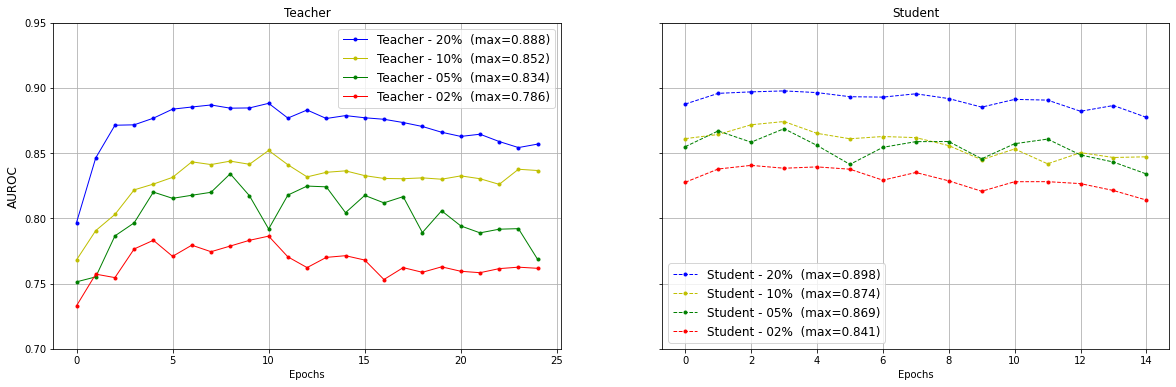

In [25]:
#plt.figure(figsize=(20,10)), plt.grid(which='major'), plt.ylim([0.65,0.95])

fig, (ax1, ax2) = plt.subplots(1,2, sharey=True, figsize=(20,6),)

# Data for teachers
colors = ['r','g','y','b']
legends = []
for p in ['20', '10','05','02']:
    data = tb_values(runsdir+f'effusion_train{p}%_teacher_00/', 'auroc/validation')
    c = colors.pop()
    l = f"Teacher - {p}%"
    amax = np.argmax(data[2])
    ax1.plot(data[2], '-'+c+'.', linewidth=1)    
    legends.append(l+f'  (max={round(data[2][amax], 3)})')
    #ax1.plot(amax, data[2][amax], c+'x')
ax1.legend(legends, fontsize='large')
ax1.grid()
ax1.set_ylim([0.7,0.95])

colors = ['r','g','y','b']
legends = []
for p in ['20', '10', '05','02']:
    data = tb_values(runsdir+f'effusion_train{p}%_finetune_00/', 'auroc/validation')
    c = colors.pop()
    l = f"Student - {p}%"
    amax = np.argmax(data[2])
    ax2.plot(data[2], '--'+c+'.', linewidth=1)
    #ax2.plot(amax, data[2][amax], c+'x')
    legends.append(l + f'  (max={round(data[2][amax], 3)})')
ax2.legend(legends, fontsize='large')
ax2.grid()

fullrun = runsdir+'effusion_train_full/'
data_full_train = tb_values(fullrun, 'auroc/validation')
amax = np.argmax(data_full_train[2])


#plt.legend(fontsize='large')
ax1.set_title(f'Teacher')
ax2.set_title(f'Student')
ax1.set_xlabel('Epochs')
ax2.set_xlabel('Epochs')
ax1.set_ylabel('AUROC',  fontsize='large')
plt.savefig(fname=f'./images_strongrun/comparison_finetune_vs_teacher.png')
tikzplotlib.save('./paper_images/teacher_stdent_comparison.tex')